In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Afficher toutes les lignes du résultat
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
def maximimsation_marge(montant,status):
    taux_marge = 0.05
    if status == "TP":
        res = 0 # le fraudeur est détecté
    elif status == "TN":
        res = taux_marge * montant # un client honnête est accepté
    elif status == "FP":
        res = 0.7*taux_marge * montant # un client honnête est bloqué
    elif status == "FN": # un fraudeur est accepté
        if montant <= 20:
            res = 0
        elif montant <= 50:
            res = -0.2 * montant
        elif montant <= 100:
            res = -0.3 * montant
        elif montant <= 200:
            res = -0.5 * montant
        else:
            res = -0.8 * montant
    return res

In [3]:
def application_regles(y_test,y_pred):
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'status': "null"})
    for index, row in df.iterrows():
        if row['y_test'] == 1 and row['y_pred'] == 1:
            df.at[index, 'status'] = "TP"
        elif row['y_test'] == 0 and row['y_pred'] == 0:
            df.at[index, 'status'] = "TN"
        elif row['y_test'] == 0 and row['y_pred'] == 1:
            df.at[index, 'status'] = "FP"
        elif row['y_test'] == 1 and row['y_pred'] == 0:
            df.at[index, 'status'] = "FN"
    return df

In [4]:
df_train = pd.read_csv("../data/classif/smote/dataframe_train.csv")
df_test = pd.read_csv("../data//classif/smote/dataframe_test.csv")

KeyError: "['Heure2', 'Minute', 'Seconde'] not found in axis"

In [ ]:
col_to_drop = ["Heure2","Minute","Seconde","CodeDecision"]

df_train = df_train.drop(columns=col_to_drop)
df_test = df_test.drop(columns=col_to_drop)

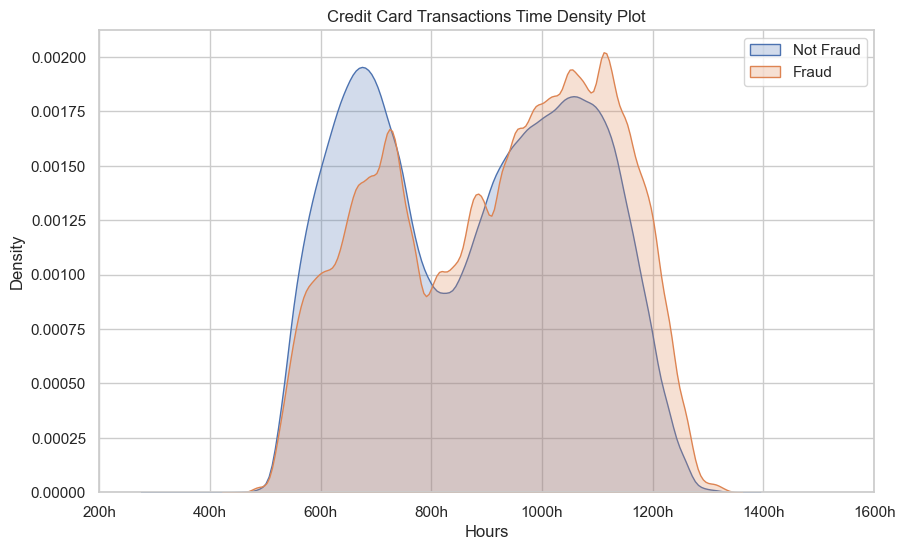

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_0 = df_train.loc[df_train['FlagImpaye'] == 0]["Heure"]
class_1 = df_train.loc[df_train['FlagImpaye'] == 1]["Heure"]

# Convertir les heures en minutes en divisant par 60
class_0_minutes = class_0 / 60
class_1_minutes = class_1 / 60

# Créer un tracé de densité avec Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(class_0_minutes, label='Not Fraud', shade=True)
sns.kdeplot(class_1_minutes, label='Fraud', shade=True)

plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.legend()

# Ajuster les étiquettes de l'axe x pour afficher les heures
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x)}h' for x in plt.xticks()[0]])

plt.show()


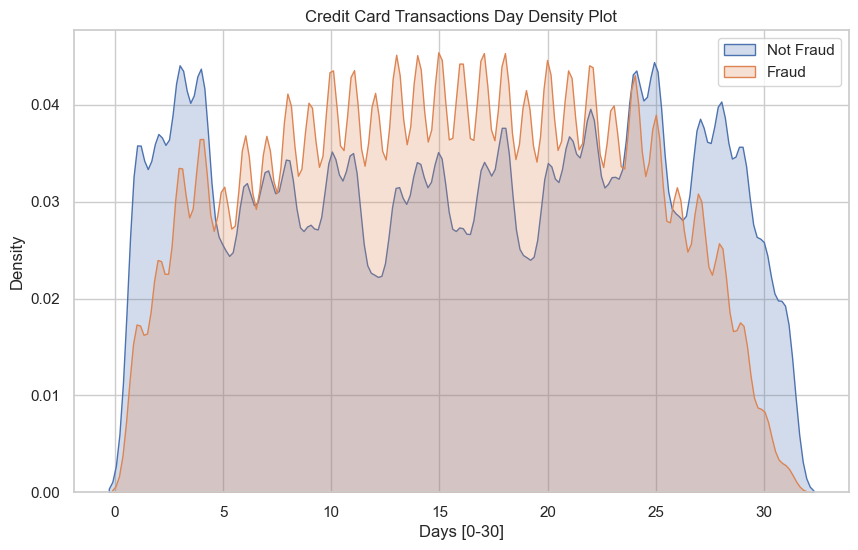

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_0 = df_train.loc[df_train['FlagImpaye'] == 0]["Jour"]
class_1 = df_train.loc[df_train['FlagImpaye'] == 1]["Jour"]

# Créer un tracé de densité avec Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(class_0, label='Not Fraud', shade=True)
sns.kdeplot(class_1, label='Fraud', shade=True)

plt.title('Credit Card Transactions Day Density Plot')
plt.xlabel('Days [0-30]')
plt.ylabel('Density')
plt.legend()

plt.show()

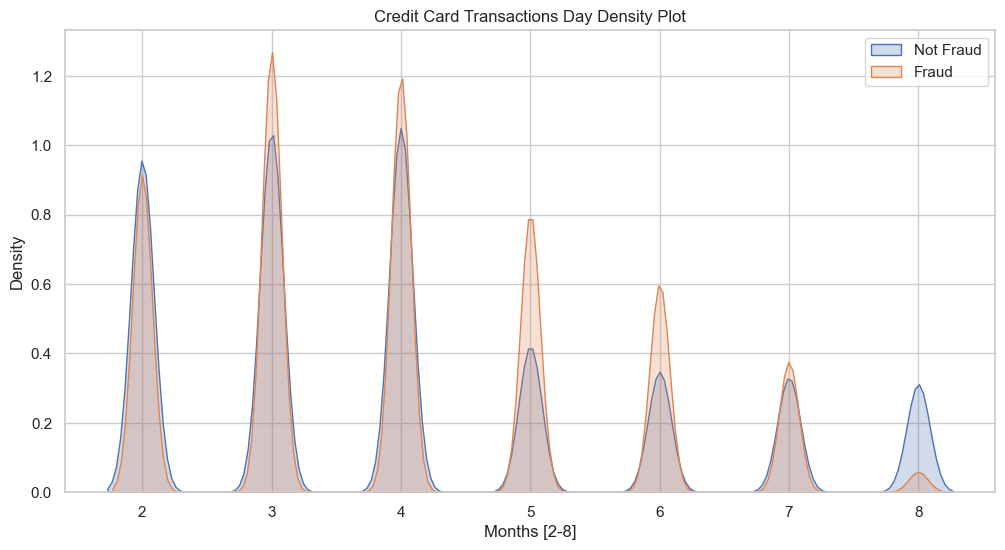

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_0 = df_train.loc[df_train['FlagImpaye'] == 0]["Mois"]
class_1 = df_train.loc[df_train['FlagImpaye'] == 1]["Mois"]

# Créer un tracé de densité avec Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12,6 ))

sns.kdeplot(class_0, label='Not Fraud', shade=True)
sns.kdeplot(class_1, label='Fraud', shade=True)

plt.title('Credit Card Transactions Day Density Plot')
plt.xlabel('Months [2-8]')
plt.ylabel('Density')
plt.legend()

plt.show()

#  Analyse Bi-varié (très long)

In [ ]:
# import seaborn as sns

# var = df_train.columns.values

# i = 0
# t0 = df_train.loc[df_train['FlagImpaye'] == 0]
# t1 = df_train.loc[df_train['FlagImpaye'] == 1]

# sns.set_style('darkgrid')
# plt.figure()
# fig, ax = plt.subplots(8,4,figsize=(16,28))

# for feature in var:
#     i += 1
#     plt.subplot(8,4,i)
#     sns.kdeplot(t0[feature], bw=0.5,label="Class = 0",palette = 'YlGnBu')
#     sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
#     plt.xlabel(feature, fontsize=12)
#     locs, labels = plt.xticks()
#     plt.tick_params(axis='both', which='major', labelsize=12)
# plt.show()

# ENLEVER OUTLIERS ????

In [ ]:
target = 'FlagImpaye'
predictors = ['Montant', 'VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1', 'TauxImpNb_RB', 'EcartNumCheq', 'NbrMagasin3J', 'DiffDateTr1', 'DiffDateTr2',
        'DiffDateTr3', 'CA3TRetMtt', 'CA3TR', 'Heure', 'Jour', 'Mois', 'Cluster_Code_Decision']

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# # test
# clf = DecisionTreeClassifier(max_depth=5, random_state=0)
# clf.fit(df_train[predictors], df_train[target].values)
# preds = clf.predict(df_test[predictors])

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.01, n_estimators=100)

# Train the model
xgb_model.fit(df_train[predictors], df_train[target].values)

# Make predictions on the test set
y_pred = xgb_model.predict(df_test[predictors])

KeyError: "['Heure2', 'Minute', 'Seconde'] not in index"

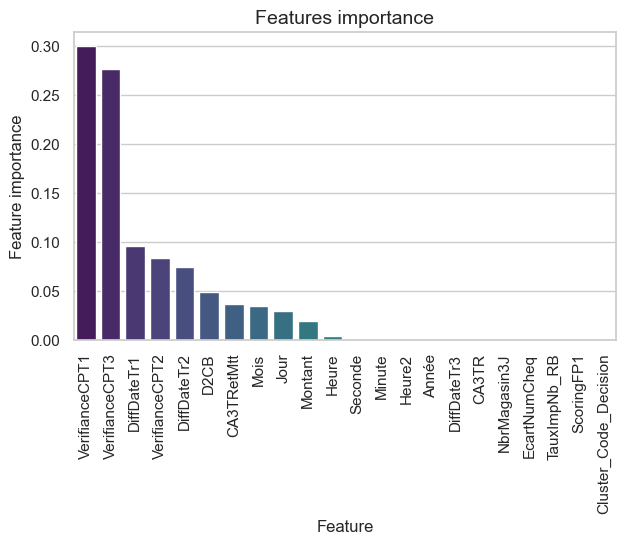

In [ ]:
### Feature Importance 

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': xgb_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,palette = 'viridis')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(df_test[target] , y_pred)
precision = precision_score(df_test[target] , y_pred)
recall = recall_score(df_test[target] , y_pred)
f1 = f1_score(df_test[target], y_pred)

new_row = {'accuracy':accuracy , 'precision':precision,'recall':recall ,'f1': f1 }
print(new_row)

{'accuracy': 0.99225205677606, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


<Figure size 1000x500 with 0 Axes>

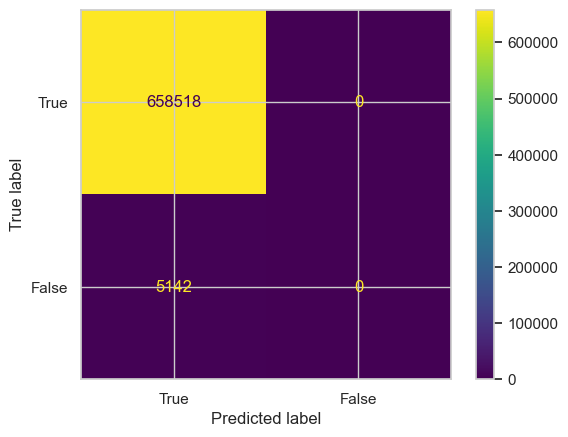

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


conf_mat = confusion_matrix(df_test[target], y_pred)
disp = ConfusionMatrixDisplay(conf_mat,display_labels = [True,False])
plt.figure(figsize = (10,5))
disp.plot()
plt.show()

# INITIALISATION

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score 
import pickle

# NE pas utiliser 'CodeDecision'
X_train = df_train.drop(['FlagImpaye','CodeDecision'], axis=1)
y_train = df_train['FlagImpaye']

X_test = df_test.drop(['FlagImpaye','CodeDecision'], axis=1)
y_test = df_test['FlagImpaye']



# Modèles
models = {
    # SGD Classifier : SVM, logistic regression 
    # or
    # kernel approximation : RBFSampler
        
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}


# TRAINING

In [ ]:
# Train chaque modèle
for model_name, model in models.items():
    
    # poids de classes ? normalement pas besoin car on fait f1(weighted) ???
    #class_weights = {0: 1, 1: 5} 
    # Entraîner le modèle en spécifiant les poids des classes

    model.fit(X_train, y_train)
    print(model_name, " fitted")

    # save models
    filename = 'models/' + model_name + '.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# LOAD MODELS & PREDICT

In [ ]:
# Initialiser un DataFrame pour stocker les résultats
f1_df = pd.DataFrame(index=['SMOTE'], columns=models.keys())
marge_df = pd.DataFrame(index=['SMOTE'], columns=models.keys())

loaded_models = {}
for model_name in models.keys():
    filename = 'models/' + model_name + '.pkl'
    with open(filename, 'rb') as file:
        loaded_models[model_name] = pickle.load(file)



# Test chaque modèle
for model_name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_df.at['SMOTE', model_name] = f1

        
    df_res = application_regles(y_test,y_pred)
    for row in df_res.itertuples():
        df_res.at[row.Index, 'marge'] = maximimsation_marge(X_test.at[row.Index, 'Montant'],row.status)

    total_marge = df_res['marge'].sum()
    marge_df.at['SMOTE', model_name] = total_marge

    print("\ F1 score du modèle sur l'ensemble de test :", f1)
    print(confusion_matrix(y_test, y_pred))

\ F1 score du modèle sur l'ensemble de test : 0.9529313992460843
[[690739  50099]
 [  5762    811]]
\ F1 score du modèle sur l'ensemble de test : 0.9863582779833395
[[739983    855]
 [  6539     34]]
\ F1 score du modèle sur l'ensemble de test : 0.9870083922635124
[[740551    287]
 [  6456    117]]


In [ ]:
marge_df.to_csv('data/smote/marge.csv')
marge_df.head()

,Decision Tree
SMOTE,1927906.39825


In [ ]:
f1_df.to_csv('data/smote/f1_df.csv')
f1_df.head()

,Decision Tree
SMOTE,0.952931


In [ ]:
df_train["FlagImpaye"].value_counts()

FlagImpaye
0    3875940
1    3875940
Name: count, dtype: int64

In [ ]:
df_test["FlagImpaye"].value_counts()

FlagImpaye
0    740838
1      6573
Name: count, dtype: int64

In [ ]:
# changer TP en => TP = FRAUDE = prédit fraude, car sinon c'est le mauvais f1 score


#optimisation de la marge
#  donner la marge maximale (si modèle hypothétiquement parfait) et comparer avec la meilleure marge obtenue, du genre 'on a perdu 10% de marge par rapport au modèle parfait'